# Installations

In [0]:
!pip install albumentations==0.4.5

     |████████████████████████████████| 122kB 4.8MB/s 
     |████████████████████████████████| 634kB 16.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=a97be40e34b195d9c44da49d7340548f2a98c9f07db6d3b4bdf7a54e18884f76
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=865c71ab480f83edb9f3866be39d4f91b3c28bcb3e9bb5fcc15e272ba6ea952d
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


# Google Drive Connection

In [0]:
## Connecting google drive to colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.19-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### Change working directory to where python files are located

In [0]:
import os
default_path = 'drive/EVA4/API'
os.chdir(default_path)
print("Current working directory: "+os.getcwd())

Current working directory: /content/drive/EVA4/API


In [0]:
# google drive path for saving models, graphs and images
PATH = "../Session11"

# Assignment 1
---

Below is the code you used to draw ZIGZAG or CYCLIC TRIANGLE plot.

In [0]:
from __future__ import print_function
import math
import numpy
import matplotlib.pyplot as plt

#----------------------------- Code to display and save plot -------------------------------#
def visualize_save_graph_matplotlib(lines, title, xaxis_title, yaxis_title, path, name):
  plt.figure(figsize=(20,10))
  for line in lines:
    plt.plot(line['x'], line['y'], label=line['name'])
  
  plt.title(title)
  plt.xlabel(xaxis_title)
  plt.ylabel(yaxis_title)
  plt.legend()
  plt.savefig(path+"/"+name+".png")

#----------------------------- Code to generate cyclic triangular plot -------------------------------#
def cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration):
  lr = []
  #max_iteration = 50
  delta_lr = lr_max - lr_min
  x_axis = [i for i in range(max_iteration + 1)]
  for iteration_num in range(max_iteration + 1):
    cycle = math.floor(1 + (iteration_num/(2*step_size)))
    x = abs((iteration_num/step_size) - (2*cycle) + 1)
    lr.append(lr_min + delta_lr*(1-x))
  return x_axis, lr

def generate_cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration, path, name):
  x_axis, lr = cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration)

  # display graph
  lines = [{'x': x_axis, 'y': [lr_max]*len(x_axis), 'name': 'max_lr'}, {'x': x_axis, 'y': lr, 'name': 'lr'}, {'x': x_axis, 'y': [lr_min]*len(x_axis), 'name': 'min_lr'}]
  title, xaxis_title, yaxis_title = "Cyclic Learning Rate", "Iteration", "Learning Rate"
  #display_graph(lines, title, xaxis_title, yaxis_title)
  visualize_save_graph_matplotlib(lines, title, xaxis_title, yaxis_title, path, name)

The above code was saved in file named [custom_cyclic_learning_rate](https://github.com/genigarus/EVA4/blob/master/S11/custom_cyclic_learning_rate.py).

Below is the code for calling the function to generate cyclic traingular graph.

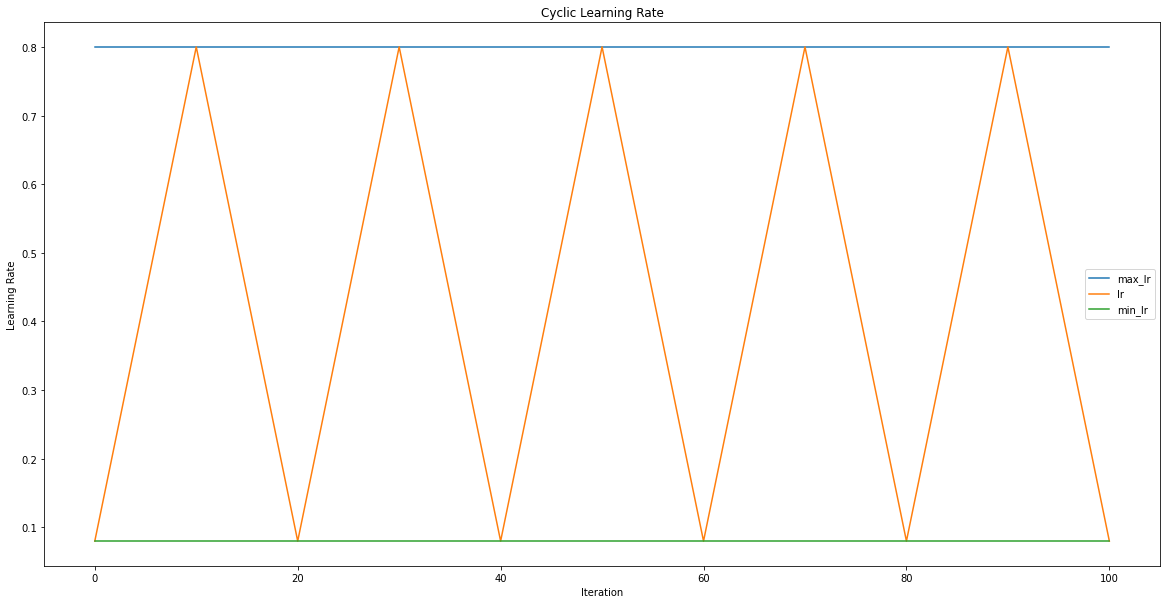

In [0]:
from custom_cyclic_learning_rate import *

lr_min, lr_max, step_size, max_iteration, path, name = 0.08, 0.8, 10, 100, PATH+"/visualization", "clr_graph"
generate_cyclic_learning_rate(lr_min, lr_max, step_size, max_iteration, path, name)

# Assignment 2

## Custom Residual Network on CIFAR10
---

1) Used [CustomResidualNet](https://github.com/genigarus/EVA4/blob/master/API/models/CustomResidualNet.py) model from [my API](https://github.com/genigarus/EVA4/tree/master/API/models)

2) Used data loader with augmentations, model loading, train, and test code to train model on Cifar10

3) Best Test Accuracy = 90.08%, Final Test accuracy = 90.08%, number of epochs = 24. 

4) Used image augmentation with Cutout

[Link to Google Colab Code File](https://colab.research.google.com/drive/1TLBXgjeO_jYI3x6Z4nrsS6_v7ZjUdtrp)

[Link to API](https://github.com/genigarus/EVA4/tree/master/API)

# Creating and Executing Pipeline for loading data, creating and training model and hyperparameter tuning

  pip install torch-lr-finder -v --global-option="amp"



 Generating train and test loaders.....
Files already downloaded and verified
Files already downloaded and verified
Finding max LR for One Cycle Policy using LR Test Range over 500 epochs...



Learning rate search finished. See the graph with {finder_name}.plot()
LR (max accuracy 86.37331680331482) to be used: 0.1840000000816


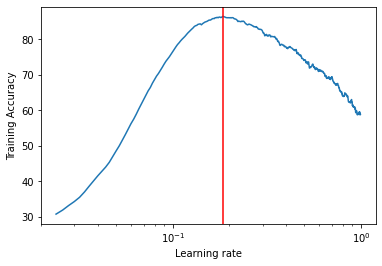

In [0]:
# Import
from network_pipeline import *

# Initialize Variables
seed = 1
means, stdevs = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
data_path = PATH+'/data'
need_albumentation = True
batch_size = 512
CIFAR10_CLASS_LABELS = ("airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
inp_size = (3, 32, 32)
path = PATH+"/model"
model_file_name = "custom_residual_network_model"

model_name, criterion, optimizer_name, scheduler_name = "CustomResidualNet", nn.CrossEntropyLoss(), "SGD", "OneCycleLR"
init_lr, init_weight_decay, end_lr, num_epochs =  1e-10, 1e-2, 1, 500

# Create Network Pipeline
network = NetworkPipeline(data_path, inp_size, seed, means, stdevs, need_albumentation, batch_size, CIFAR10_CLASS_LABELS, model_name, criterion, optimizer_name, scheduler_name)

# Use LR Test Range to find maximum LR
best_lr = network.find_network_lr(init_lr, init_weight_decay, end_lr, num_epochs)


Sample Dataset after transformation
 ship  bird airplane automobile airplane


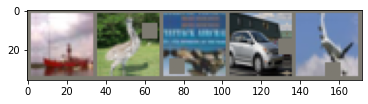

In [0]:
# Display sample data
print("Sample Dataset after transformation")
show_sample_images(network.train_loader, network.labels_list)

  0%|          | 0/98 [00:00<?, ?it/s]

Creating model...

 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
    

Loss=2.056711196899414 Batch_id=97 Accuracy=33.29: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 3771/10000 (37.71%)

EPOCH: 2


Loss=1.9597527980804443 Batch_id=97 Accuracy=42.46: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 3754/10000 (37.54%)

EPOCH: 3


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 5297/10000 (52.97%)

EPOCH: 4


Loss=1.881163239479065 Batch_id=97 Accuracy=52.76: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 5489/10000 (54.89%)

EPOCH: 5


Loss=1.8701469898223877 Batch_id=97 Accuracy=55.18: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 5551/10000 (55.51%)

EPOCH: 6


Loss=1.8733208179473877 Batch_id=97 Accuracy=57.66: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 5950/10000 (59.50%)

EPOCH: 7


Loss=1.856151819229126 Batch_id=97 Accuracy=59.83: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6110/10000 (61.10%)

EPOCH: 8


Loss=1.7744345664978027 Batch_id=97 Accuracy=67.50: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6665/10000 (66.65%)

EPOCH: 9


Loss=1.7336671352386475 Batch_id=97 Accuracy=69.72: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6476/10000 (64.76%)

EPOCH: 10


Loss=1.7390300035476685 Batch_id=97 Accuracy=71.86: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7376/10000 (73.76%)

EPOCH: 11


Loss=1.7270395755767822 Batch_id=97 Accuracy=73.49: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7271/10000 (72.71%)

EPOCH: 12


Loss=1.7687898874282837 Batch_id=97 Accuracy=74.08: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7101/10000 (71.01%)

EPOCH: 13


Loss=1.7172081470489502 Batch_id=97 Accuracy=74.67: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7180/10000 (71.80%)

EPOCH: 14


Loss=1.6939152479171753 Batch_id=97 Accuracy=76.04: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7407/10000 (74.07%)

EPOCH: 15


Loss=1.680350661277771 Batch_id=97 Accuracy=76.96: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7671/10000 (76.71%)

EPOCH: 16


Loss=1.667820930480957 Batch_id=97 Accuracy=77.89: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7503/10000 (75.03%)

EPOCH: 17


Loss=1.6785091161727905 Batch_id=97 Accuracy=78.64: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7719/10000 (77.19%)

EPOCH: 18


Loss=1.6380541324615479 Batch_id=97 Accuracy=79.35: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7868/10000 (78.68%)

EPOCH: 19


Loss=1.6687983274459839 Batch_id=97 Accuracy=80.34: 100%|██████████| 98/98 [00:22<00:00,  4.37it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7851/10000 (78.51%)

EPOCH: 20


Loss=1.614336609840393 Batch_id=97 Accuracy=84.04: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8494/10000 (84.94%)

EPOCH: 21


Loss=1.5701735019683838 Batch_id=97 Accuracy=88.21: 100%|██████████| 98/98 [00:22<00:00,  4.29it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8740/10000 (87.40%)

EPOCH: 22


Loss=1.588016152381897 Batch_id=97 Accuracy=89.82: 100%|██████████| 98/98 [00:22<00:00,  4.35it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8841/10000 (88.41%)

EPOCH: 23


Loss=1.543359637260437 Batch_id=97 Accuracy=91.02: 100%|██████████| 98/98 [00:22<00:00,  4.36it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8933/10000 (89.33%)

EPOCH: 24


Loss=1.533703088760376 Batch_id=97 Accuracy=92.13: 100%|██████████| 98/98 [00:22<00:00,  4.36it/s]



Test set: Average loss: 0.0031, Accuracy: 9008/10000 (90.08%)


 Model training completed...

 Saving trained model and parameters...

 Visualizing:


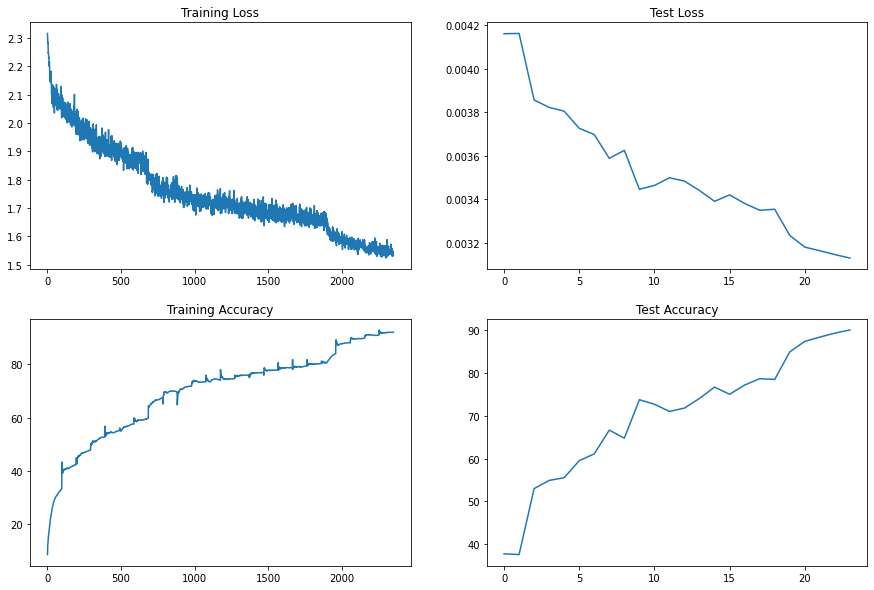

In [0]:
# Intialize variables for creating and training model
MOMENTUM=0.9
WEIGHT_DECAY=5e-4
DIV_FACTOR = 10

# final_div_factor = div_factor for no annhilation
FINAL_DIV_FACTOR = 10
EPOCHS = 24
MAX_LR_EPOCH = 5
NUM_OF_BATCHES = network.num_of_batches
PCT_START = MAX_LR_EPOCH/EPOCHS

# Based on above found maximum LR, initialize LRMAX and LRMIN
LRMAX = best_lr
LRMIN = LRMAX/DIV_FACTOR

# Initialize optimizer and scheduler parameters
optim_params = {"lr": LRMIN, "momentum": MOMENTUM, "weight_decay": WEIGHT_DECAY}
scheduler_params = {"max_lr": LRMAX, "steps_per_epoch": NUM_OF_BATCHES, "epochs": EPOCHS, "pct_start": PCT_START, "anneal_strategy":"linear", "div_factor": DIV_FACTOR, "final_div_factor": FINAL_DIV_FACTOR}

# Build model with specified optimizer and scheduler
network.build_network(optim_params, scheduler_params)

# Train model
network.train_network(EPOCHS, is_ocp=True)

# Save model and parameters
network.save_network(path, model_file_name)

# Visualize training and test accuracy and loss
print("\n Visualizing:")
visualize_graph(network.train_losses, network.train_acc, network.test_losses, network.test_acc)

# Visualize Training Vs Test Accuracy of Trained Model

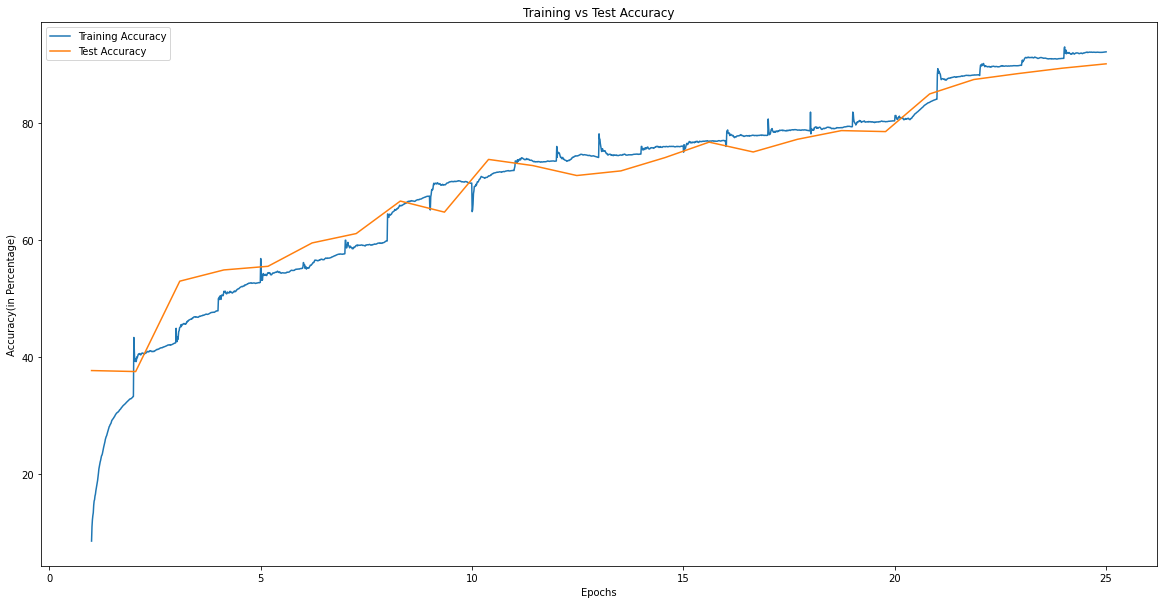

In [0]:
dict_list = {'Training Accuracy': network.train_acc, 'Test Accuracy': network.test_acc}
title = "Training vs Test Accuracy"
xlabel = "Epochs"
ylabel = "Accuracy(in Percentage)"
name = "train_vs_test_acc_comparison_graph"

visualize_save_train_vs_test_graph(EPOCHS, dict_list, title, xlabel, ylabel, PATH+"/visualization", name=name)

# View Correctly Classified Images
---

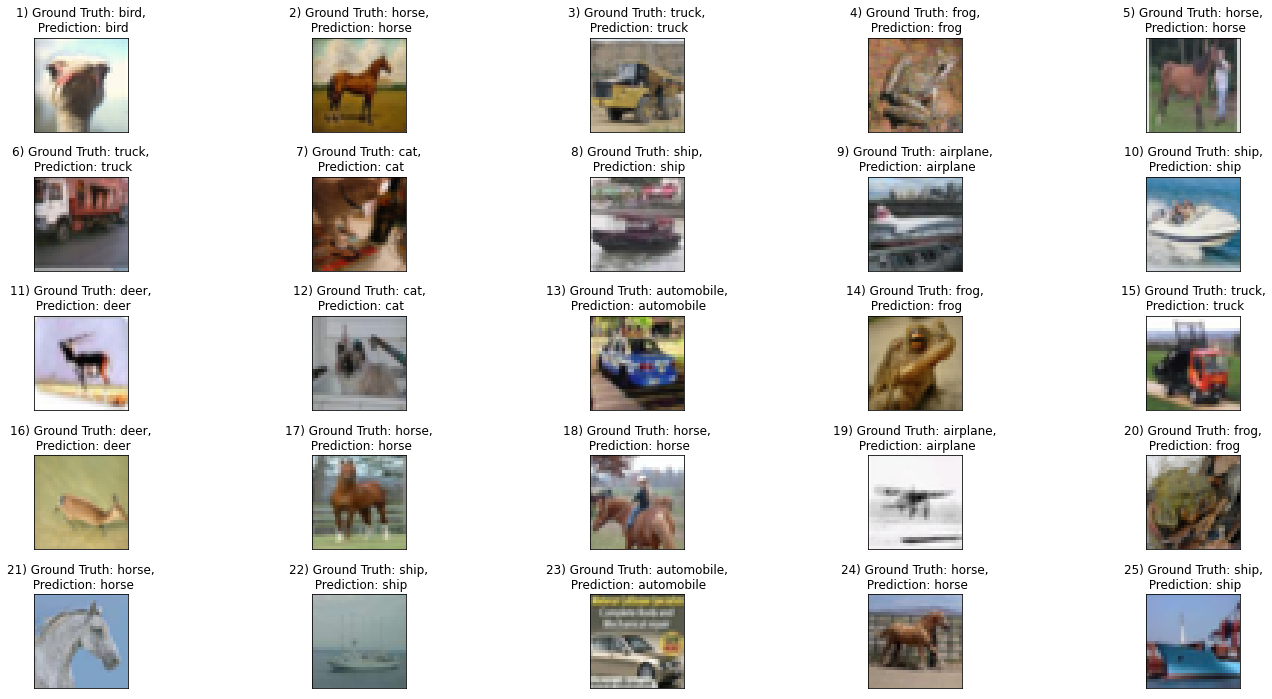

In [0]:
show_save_correctly_classified_images(network.model, network.test_loader, network.device, PATH, name="correctly_classified_imgs", max_correctly_classified_images_imgs=25)

# View Incorrectly Classified Images
---

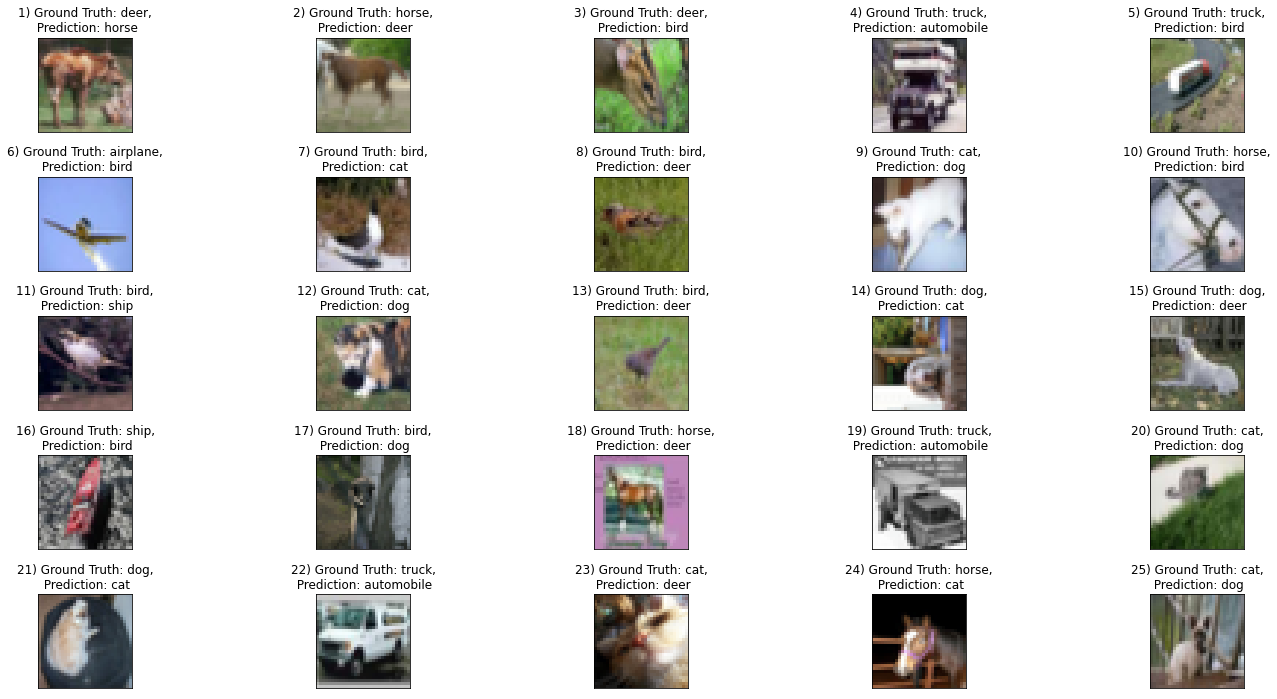

In [0]:
show_save_misclassified_images(network.model, network.test_loader, network.device, PATH, name="misclassified_imgs", max_misclassified_imgs=25)

# GradCAM Visualization
---

### Fetching correctly and incorrectly classified images

In [0]:
misclassified_imgs, correctly_classified_images = classify_images(network.model, network.test_loader, network.device, 25)

In [0]:
target_layers = ["layer1_x","rb1","layer2","rb2"]
viz_cam = VisualizeCam(network.model, network.labels_list, target_layers)

## For correctly classified images:-

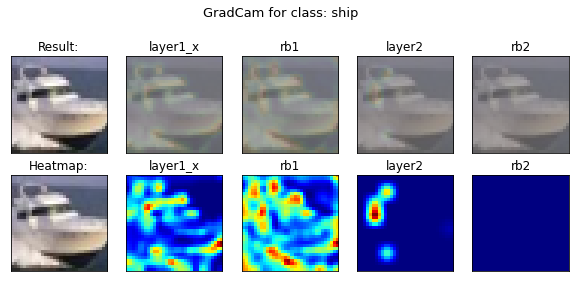

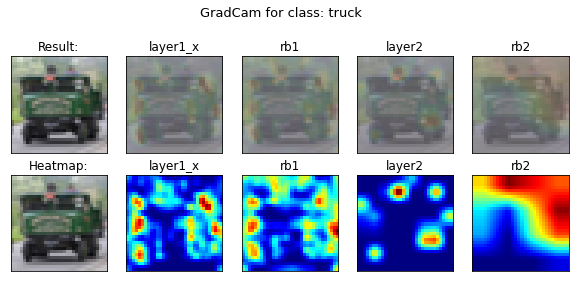

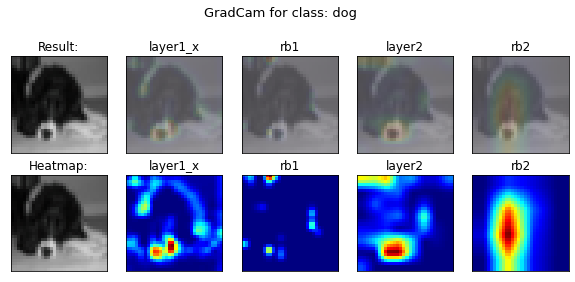

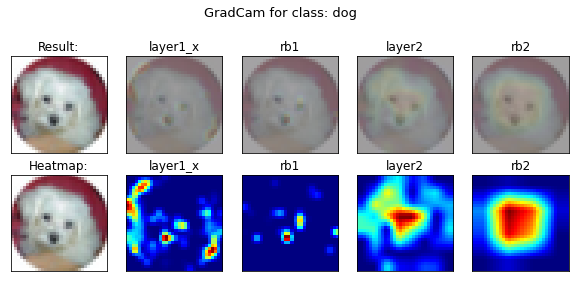

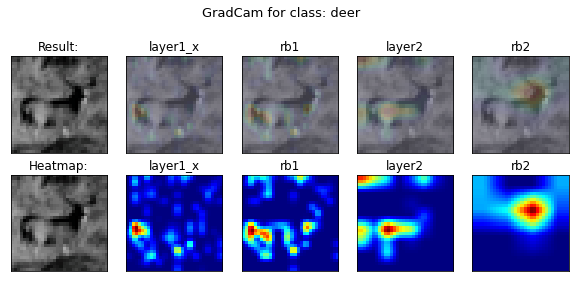

In [0]:
correct_pred_imgs = []
for i in range(len(correctly_classified_images)):
  correct_pred_imgs.append(torch.as_tensor(correctly_classified_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, PATH+"/visualization", metric="correct")

## For misclassified images:-

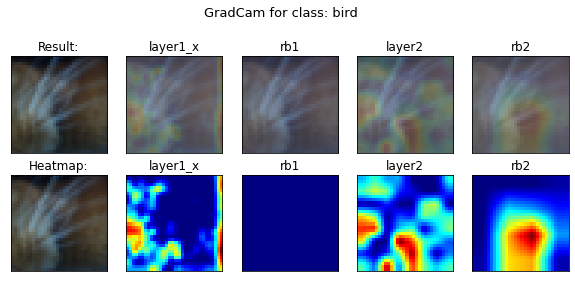

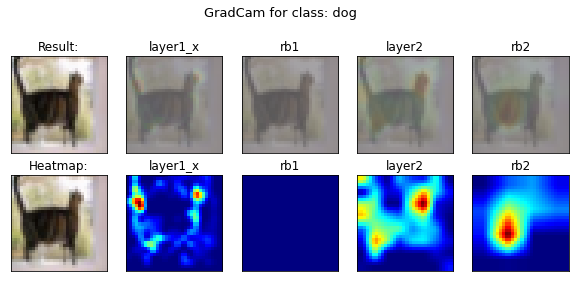

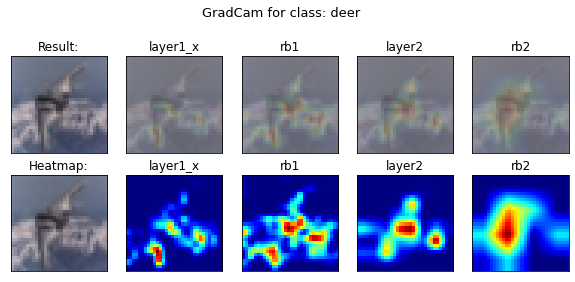

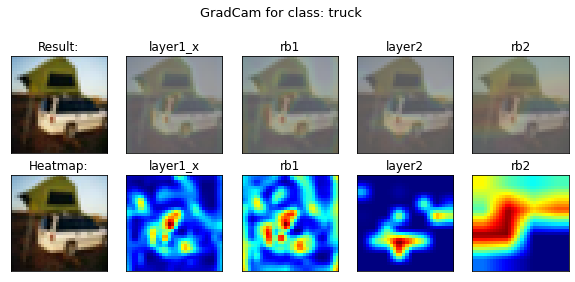

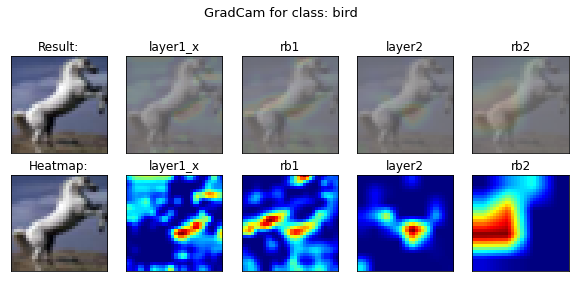

In [0]:
misclassified_pred_images = []
for i in range(len(misclassified_imgs)):
  misclassified_pred_images.append(torch.as_tensor(misclassified_imgs[i]["img"]))
viz_cam(torch.stack(misclassified_pred_images), target_layers, PATH+"/visualization", metric="incorrect")

# Grad-CAM for 25 misclassified images

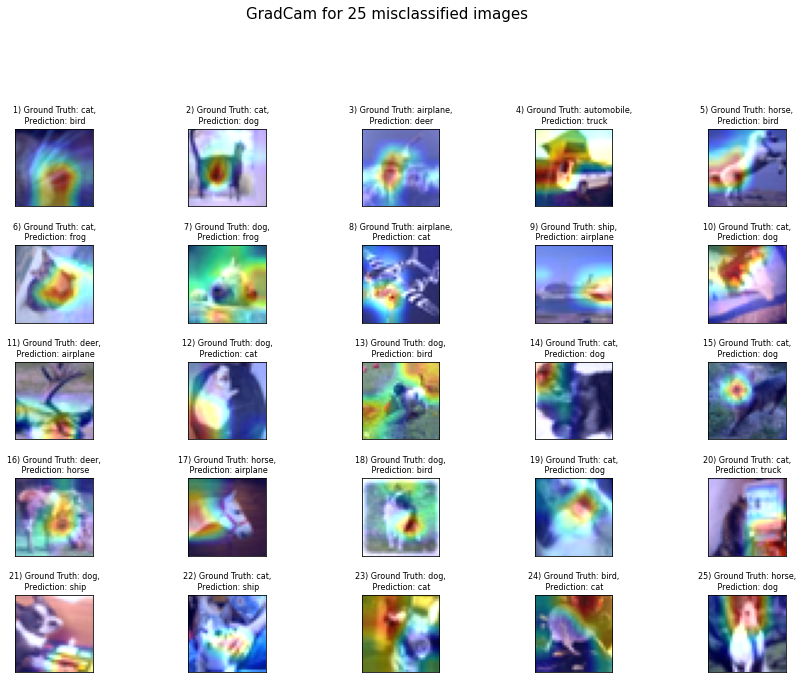

In [0]:
viz_cam.plot_img_heatmap(misclassified_imgs, target_layers, PATH+"/visualization", target_inds=None, metric="", name="gradcam_misclassified_images")